In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [3]:
k = 7
f = '../assignment-2-ksr-0011/Data/SMAI-Dataset-problem-4.3/colors.pkl'

data = pickle.load(open(f, 'rb'))
data.shape

(100, 2)

### Using GMM to cluster the likely color components of the image.
We can calculate the means, covariances, prior probabilites of the likely color components using GMM from sklearn.


In [7]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=k, covariance_type='full')
gmm.fit(data)

means = gmm.means_
covs = gmm.covariances_
prior_probs = gmm.weights_

pred_labels = gmm.predict(data)

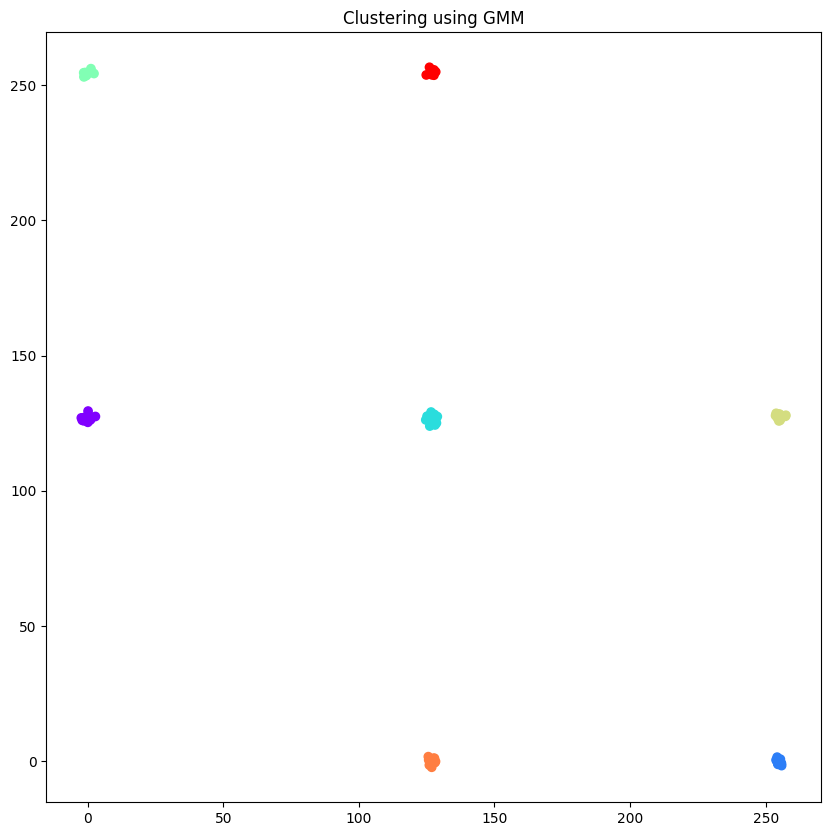

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], c=pred_labels, cmap='rainbow')
plt.title('Clustering using GMM')
plt.show()

### Generating dataset from the means, covariances, prior probabilites of the likely color components.

In [12]:
from scipy.stats import multivariate_normal as mvn

def generate_dataset(n, means, covs):
    gen_data = []
    for i in range(n):
        z = np.random.choice(k, p=prior_probs)
        gen_data.append(np.random.multivariate_normal(means[z], covs[z]))
    return np.array(gen_data)

In [15]:
sample = generate_dataset(700, means, covs)

C:\Users\krish\AppData\Local\Temp\ipykernel_21672\3858972800.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sample[:, 0], sample[:, 1], c='red', cmap='rainbow')


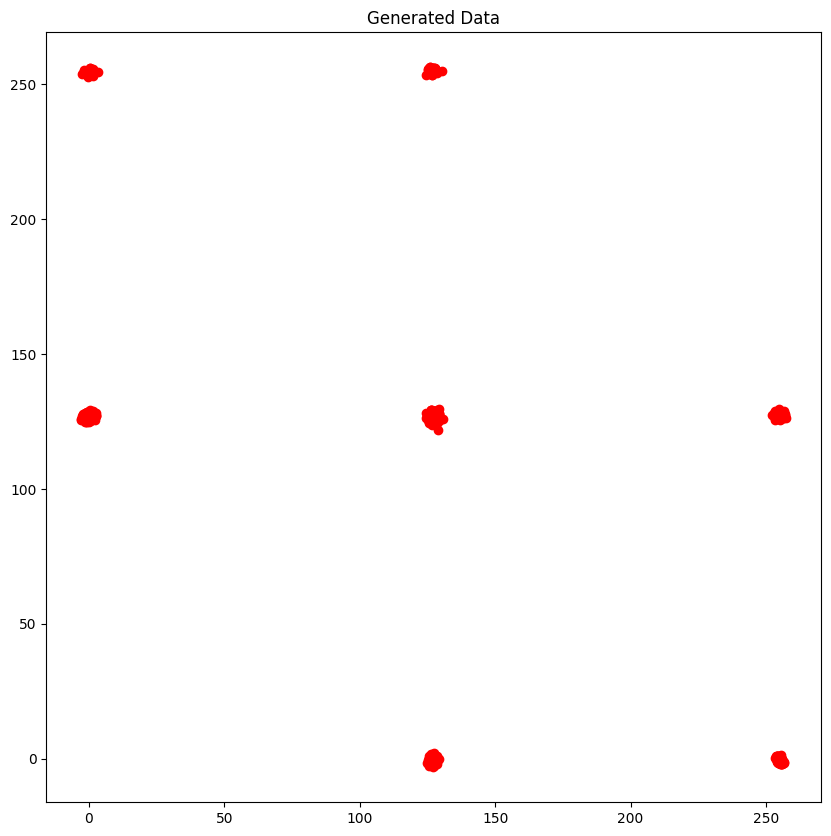

In [16]:
plt.figure(figsize=(10, 10))
plt.scatter(sample[:, 0], sample[:, 1], c='red', cmap='rainbow')
plt.title('Generated Data')
plt.show()


We can clearly observe that the points are almost identical, thus the data has successfully been generated.
